In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [2]:
df_levels = pd.read_csv('./data/list_levels.csv')#.sort_values(by='count', ascending=False)
df_tags = pd.read_csv('./data/list_tags.csv')#.sort_values(by='count', ascending=False)
df_attr = pd.read_csv('./data/list_attr_val.csv')#.sort_values(by='count', ascending=False)

In [3]:
df_attr

,level,tag,attr,attr_val,count
0,front,journal-id,journal-id-type,nlm-ta,418366
1,front,journal-id,journal-id-type,iso-abbrev,397298
2,front,journal-id,journal-id-type,publisher-id,266545
3,front,journal-id,journal-id-type,pmc,51695
4,front,journal-id,journal-id-type,hwp,26278
...,...,...,...,...,...
25241317,disp-formula,{http://www.w3.org/1998/Math/MathML}math,id,M11,1
25241318,disp-formula,{http://www.w3.org/1998/Math/MathML}math,id,M12,1
25241319,disp-formula,{http://www.w3.org/1998/Math/MathML}math,overflow,scroll,1
25241320,disp-formula,{http://www.w3.org/1998/Math/MathML}mo,stretchy,false,1


# Getting the total by levels


The articles are often splitted in several parent levels. These contains different type of information. 

In [4]:
# Remove the lowest 1% 
df_levels_to_plot = df_levels[df_levels['count'] > max(df_levels['count'])*0.01]

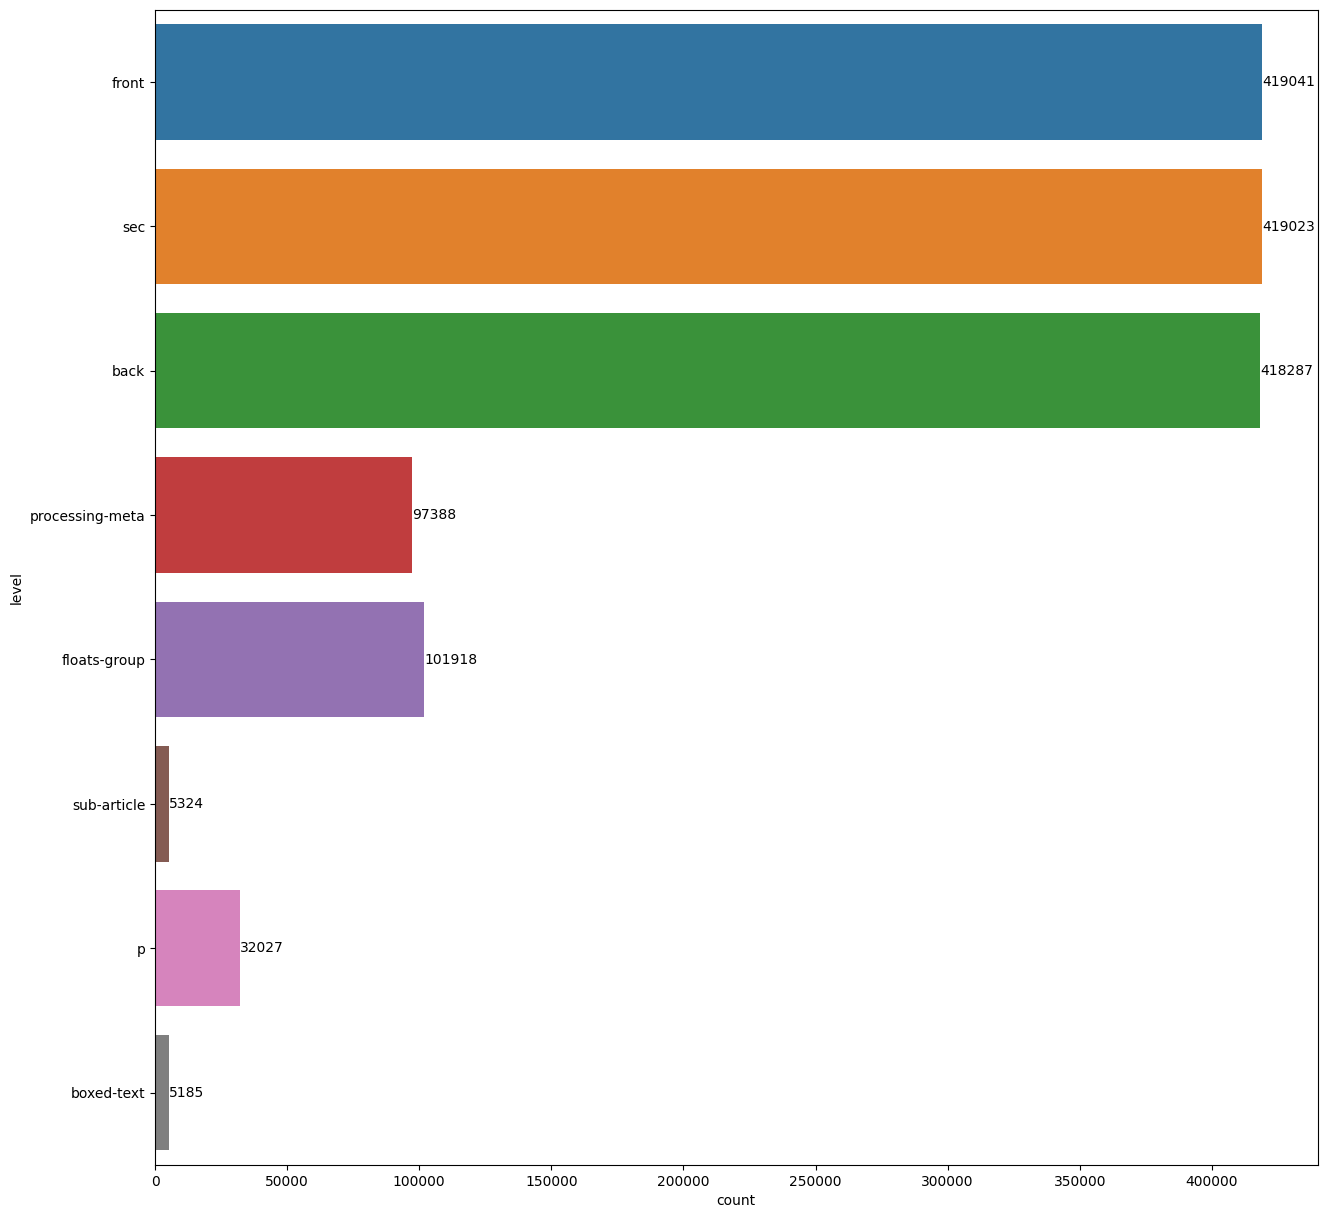

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=df_levels_to_plot['level'], x=df_levels_to_plot['count'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Getting the total of tag per section

In [ ]:
# Remove the lowest 1% 
df_tags_to_plot = df_tags[df_tags['count'] > max(df_tags['count'])*0.01]

In [ ]:
tag_count = df_tags_to_plot[['level', 'tag', 'count']].groupby(['level', 'tag']).agg(['max'])['count'].reset_index().sort_values(by='max', ascending=False)
#level_tag_count['level-tag'] = level_tag_count['level'] + '_' + level_tag_count['tag']
to_plot = tag_count[['tag', 'level', 'max']].head(400)

tag_count

In [ ]:
level_unique = len(to_plot['level'].unique())
n_col = 2
n_row = math.ceil(level_unique/n_col)
to_plot = to_plot

fig, axes = plt.subplots(n_row,n_col, figsize=(50,100))

n = 0
i = 0
for (level, grp) in to_plot.groupby("level"):
    sns.barplot(y="tag", 
                x="max", 
                data=grp,
                #order=grp.sort_values('max'),
                ax=axes[i,n], 
                orient='h')
    
    axes[i, n].set_title(f"{level}")
    axes[i, n].bar_label(axes[i, n].containers[0])
    n+=1
    if n > n_col-1:
        n=0
        i+=1
if n == 1:
    axes[i, n].remove()
plt.show()

# For the sec section

## Getting the attr and attr_value for the level sec and tag sec 

In [19]:
sec_attr_max = df_attr[(df_attr['level'] == 'sec') & (df_attr['tag'] == 'xref')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
sec_attr_max

,attr,attr_val,max
3806,ref-type,bibr,403202
3817,ref-type,fig,379954
3844,ref-type,table,303647
3843,ref-type,supplementary-material,97223
2607178,rid,F1,89255
...,...,...,...
2579153,rid,CR84_2,1
2579152,rid,CR84_10,1
2579151,rid,CR849,1
2579150,rid,CR848,1


In [6]:
sec_attr_max = df_attr[(df_attr['level'] == 'sec')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)

2635847     ref-type
2635858     ref-type
2635885     ref-type
6860           frame
10370836       rules
              ...   
4420122          rid
4420123          rid
4420124          rid
4420125          rid
6553084          rid
Name: attr, Length: 13106169, dtype: object

In [11]:
sec_attr_max = df_attr[(df_attr['level'] == 'sec')].groupby(['tag', 'attr'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)

In [13]:
sec_attr_max['attr'].unique()

array(['ref-type', 'frame', 'rules', 'sec-type', 'position', 'align',
       'content-type', 'colspan', 'rowspan', 'ext-link-type', 'rid',
       'orientation', 'id', 'span', 'pub-id-type', 'valign', 'toggle',
       'char', 'mimetype', 'list-type', 'mathvariant', 'stretchy',
       'fig-type', 'mime-subtype', 'display', 'style',
       '{http://www.w3.org/1999/xlink}href', 'overflow', 'open', 'close',
       '{http://www.w3.org/XML/1998/namespace}lang',
       '{http://www.w3.org/1999/xlink}type', 'accent', 'disp-level',
       'displaystyle', 'border', 'cellpadding', 'cellspacing', 'width',
       'scope', 'columnalign', '{http://www.w3.org/1999/xlink}role',
       'separators', 'fn-type', 'movablelimits', 'linebreak', 'altimg',
       'specific-use', 'mathsize', 'accentunder', 'institution-id-type',
       'form', 'class', 'scriptlevel',
       '{http://www.w3.org/1999/xlink}show', 'linebreakstyle', 'bevelled',
       'underline-style', 'symmetric', 'license-type', 'alttext',
      

In [ ]:
level_unique = len(sec_attr_max['attr'].unique())
n_col = 2
n_row = math.ceil(level_unique/n_col)
to_plot = sec_attr_max

fig, axes = plt.subplots(n_row,n_col, figsize=(30,100))

n = 0
i = 0
for (level, grp) in to_plot.groupby("attr"):
    sns.barplot(y="attr_val", 
                x="max", 
                data=grp,
                #order=grp.sort_values('max'),
                ax=axes[i,n], 
                orient='h')
    
    axes[i, n].set_title(f"{level}")
    axes[i, n].bar_label(axes[i, n].containers[0])
    n+=1
    if n > n_col-1:
        n=0
        i+=1
if n == 1:
    axes[i, n].remove()
plt.show()

## Getting the attr and attr_value for the tag sec and attr sec-type

In [21]:
sec_tag_max = df_attr[(df_attr['level'] == 'sec')].groupby('tag')['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
sec_tag_max

,tag,max
85,xref,403202
67,table,217226
58,sec,206107
25,fig,192318
68,table-wrap,173026
...,...,...
28,fn-group,1
89,{http://www.w3.org/1998/Math/MathML}maction,1
69,table-wrap-foot,1
2,aff,1


In [18]:
sec_sec_type_max = df_attr[(df_attr['level'] == 'sec') & (df_attr['tag'] == 'sec') & (df_attr['attr'] == 'sec-type')].groupby('attr_val')['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
sec_sec_type_max = sec_sec_type_max[sec_sec_type_max['max'] > 5]#max(sec_sec_type_max['max'])*0.0001]
sec_sec_type_max


,attr_val,max
953,results,206107
629,discussion,182243
741,intro,153469
1039,supplementary-material,140201
805,materials|methods,119652
...,...,...
295,Number of columns,6
1128,treatment-type material,6
296,Number of data sets,6
117,Data set name,6


In [ ]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=sec_sec_type_max['attr_val'], x=sec_sec_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# For the front level

In [ ]:
front_sec_type_max = df_attr[(df_attr['level'] == 'front')].groupby('attr_val')['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)


In [36]:
front_sec_type_max = df_attr[(df_attr['level'] == 'front')].groupby(['tag'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
front_sec_type_max = front_sec_type_max[front_sec_type_max['max'] > max(front_sec_type_max['max'])*0.001]
front_sec_type_max

,tag,max
9,article-id,419041
26,contrib,418967
65,journal-id,418366
60,issn,416967
100,subj-group,416950
...,...,...
20,collab,622
47,fn-group,584
124,{http://www.w3.org/1998/Math/MathML}math,575
39,elocation-id,492


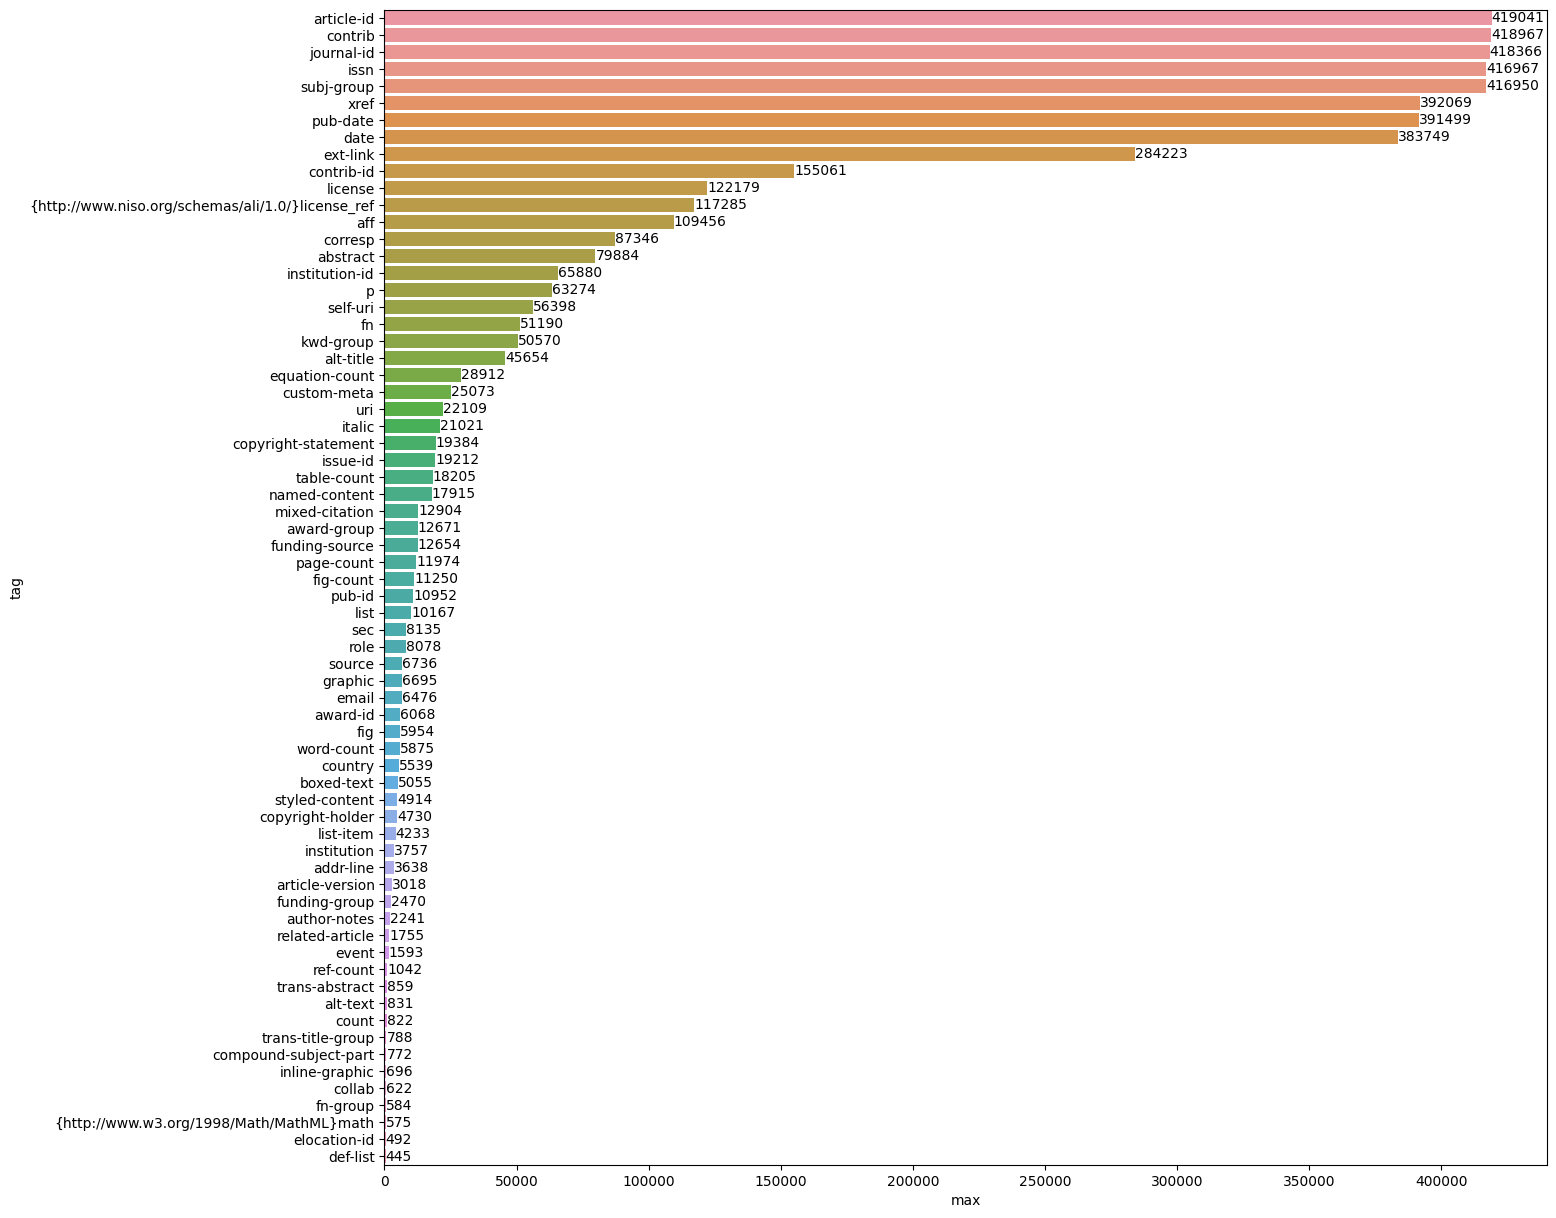

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=front_sec_type_max['tag'], x=front_sec_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [32]:
article_id = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'article-id')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
#article_id = article_id[article_id['max'] > max(article_id['max'])*0.001]
article_id

,attr,attr_val,max
10,pub-id-type,pmcid,419041
5,pub-id-type,doi,411432
12,pub-id-type,publisher-id,331142
11,pub-id-type,pmid,154995
9,pub-id-type,pii,23724
6,pub-id-type,manuscript,5426
1,pub-id-type,art-access-id,4873
8,pub-id-type,other,3960
13,pub-id-type,publisher-manuscript,1162
14,pub-id-type,sici,680


In [33]:
contrib = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'contrib')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
contrib

,attr,attr_val,max
0,contrib-type,author,418967
6,corresp,yes,176327
2,contrib-type,editor,81036
10,equal-contrib,yes,40745
11,id,A1,19723
...,...,...,...
81310,id,cam41418-cr-0001,1
81311,id,cam41418-cr-0002,1
81312,id,cam41418-cr-0003,1
81313,id,cam41418-cr-0004,1


In [34]:
journal_id = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'journal-id')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
journal_id

,attr,attr_val,max
9,journal-id-type,nlm-ta,418366
6,journal-id-type,iso-abbrev,397298
11,journal-id-type,publisher-id,266545
10,journal-id-type,pmc,51695
4,journal-id-type,hwp,26278
3,journal-id-type,doi,20535
8,journal-id-type,nlm-journal-id,5419
12,journal-id-type,pubmed-jr-id,5186
2,journal-id-type,coden,2876
7,journal-id-type,issn,915


In [38]:
subj_group = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'subj-group')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
subj_group

,attr,attr_val,max
64,subj-group-type,heading,416950
75,subj-group-type,overline,21085
12,subj-group-type,Discipline-v3,19085
10,subj-group-type,Discipline-v2,14299
67,subj-group-type,hwp-journal-coll,8798
...,...,...,...
19,subj-group-type,Parasitology,1
21,subj-group-type,Psychology & Psychiatry,1
47,subj-group-type,category-toc-hrading,1
68,subj-group-type,journal-section,1


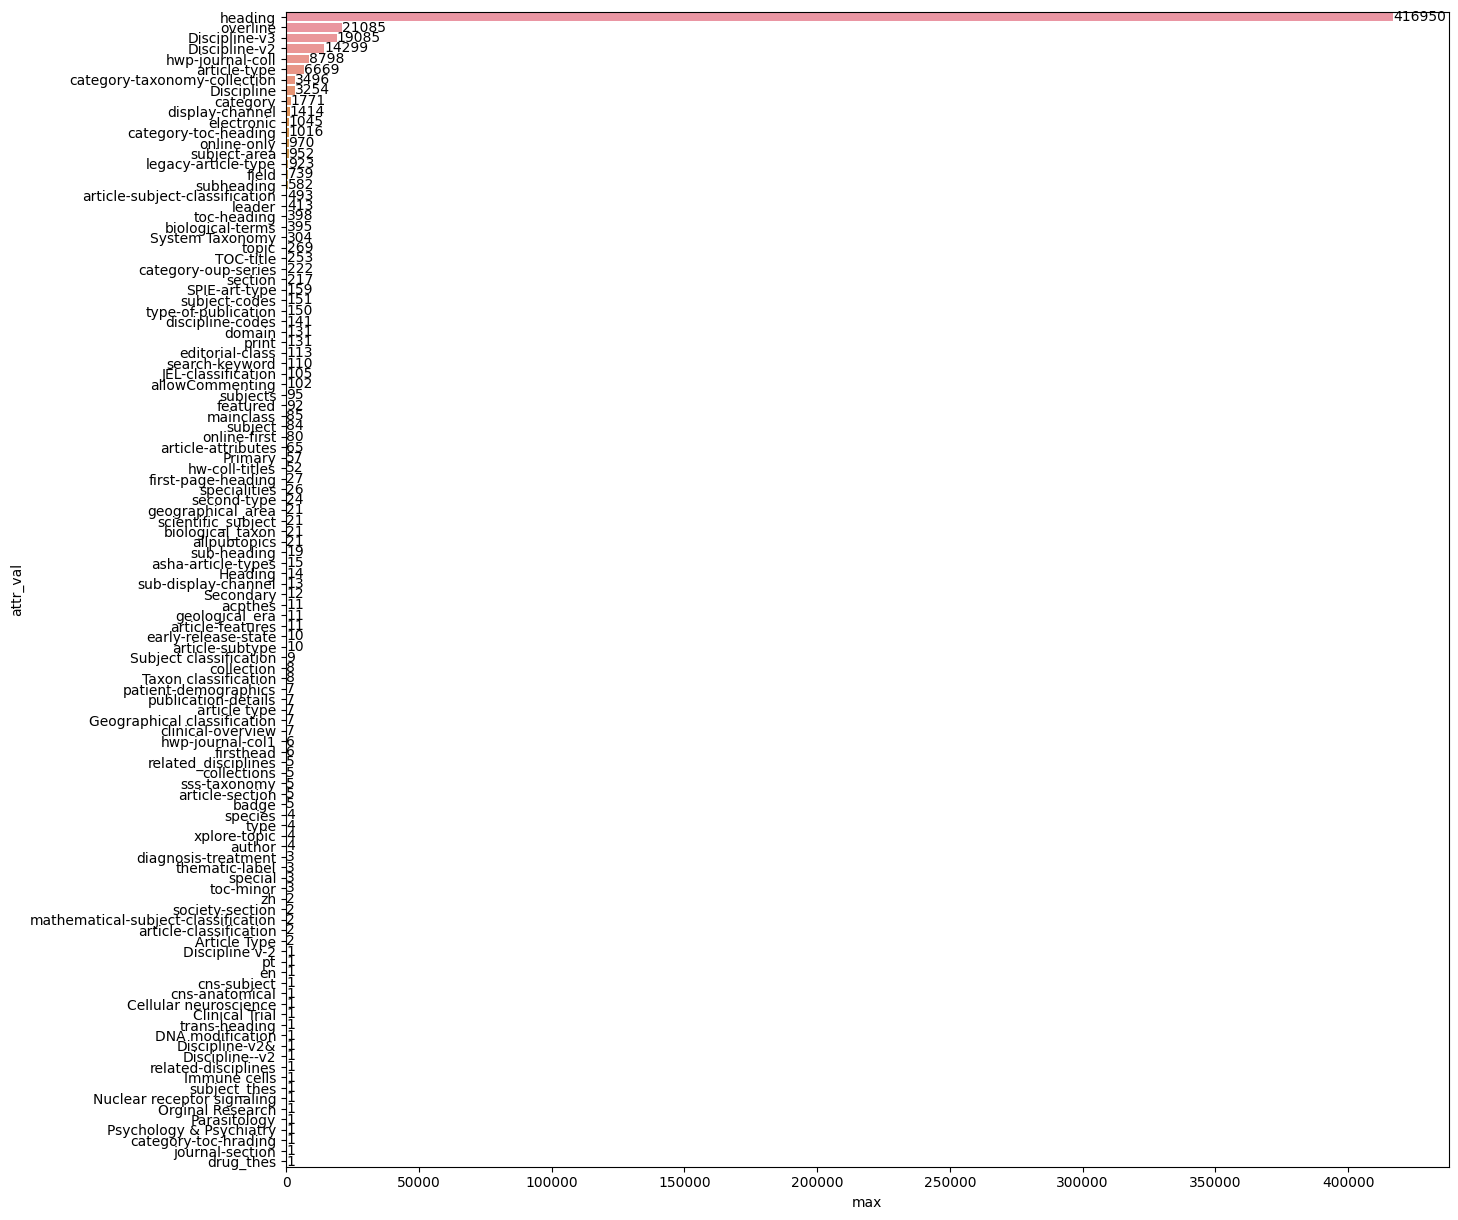

In [40]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=subj_group['attr_val'], x=subj_group['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
issn = df_attr[(df_attr['level'] == 'front') & (df_attr['tag'] == 'issn')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
issn

# For the back level

In [7]:
back_type_max = df_attr[(df_attr['level'] == 'back')].groupby(['tag'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
back_type_max

,tag,max
66,pub-id,414978
63,person-group,317103
26,element-citation,238193
53,mixed-citation,172971
29,ext-link,172132
...,...,...
61,page-count,1
65,private-char,1
83,table-wrap-foot,1
104,{http://www.w3.org/1998/Math/MathML}menclose,1


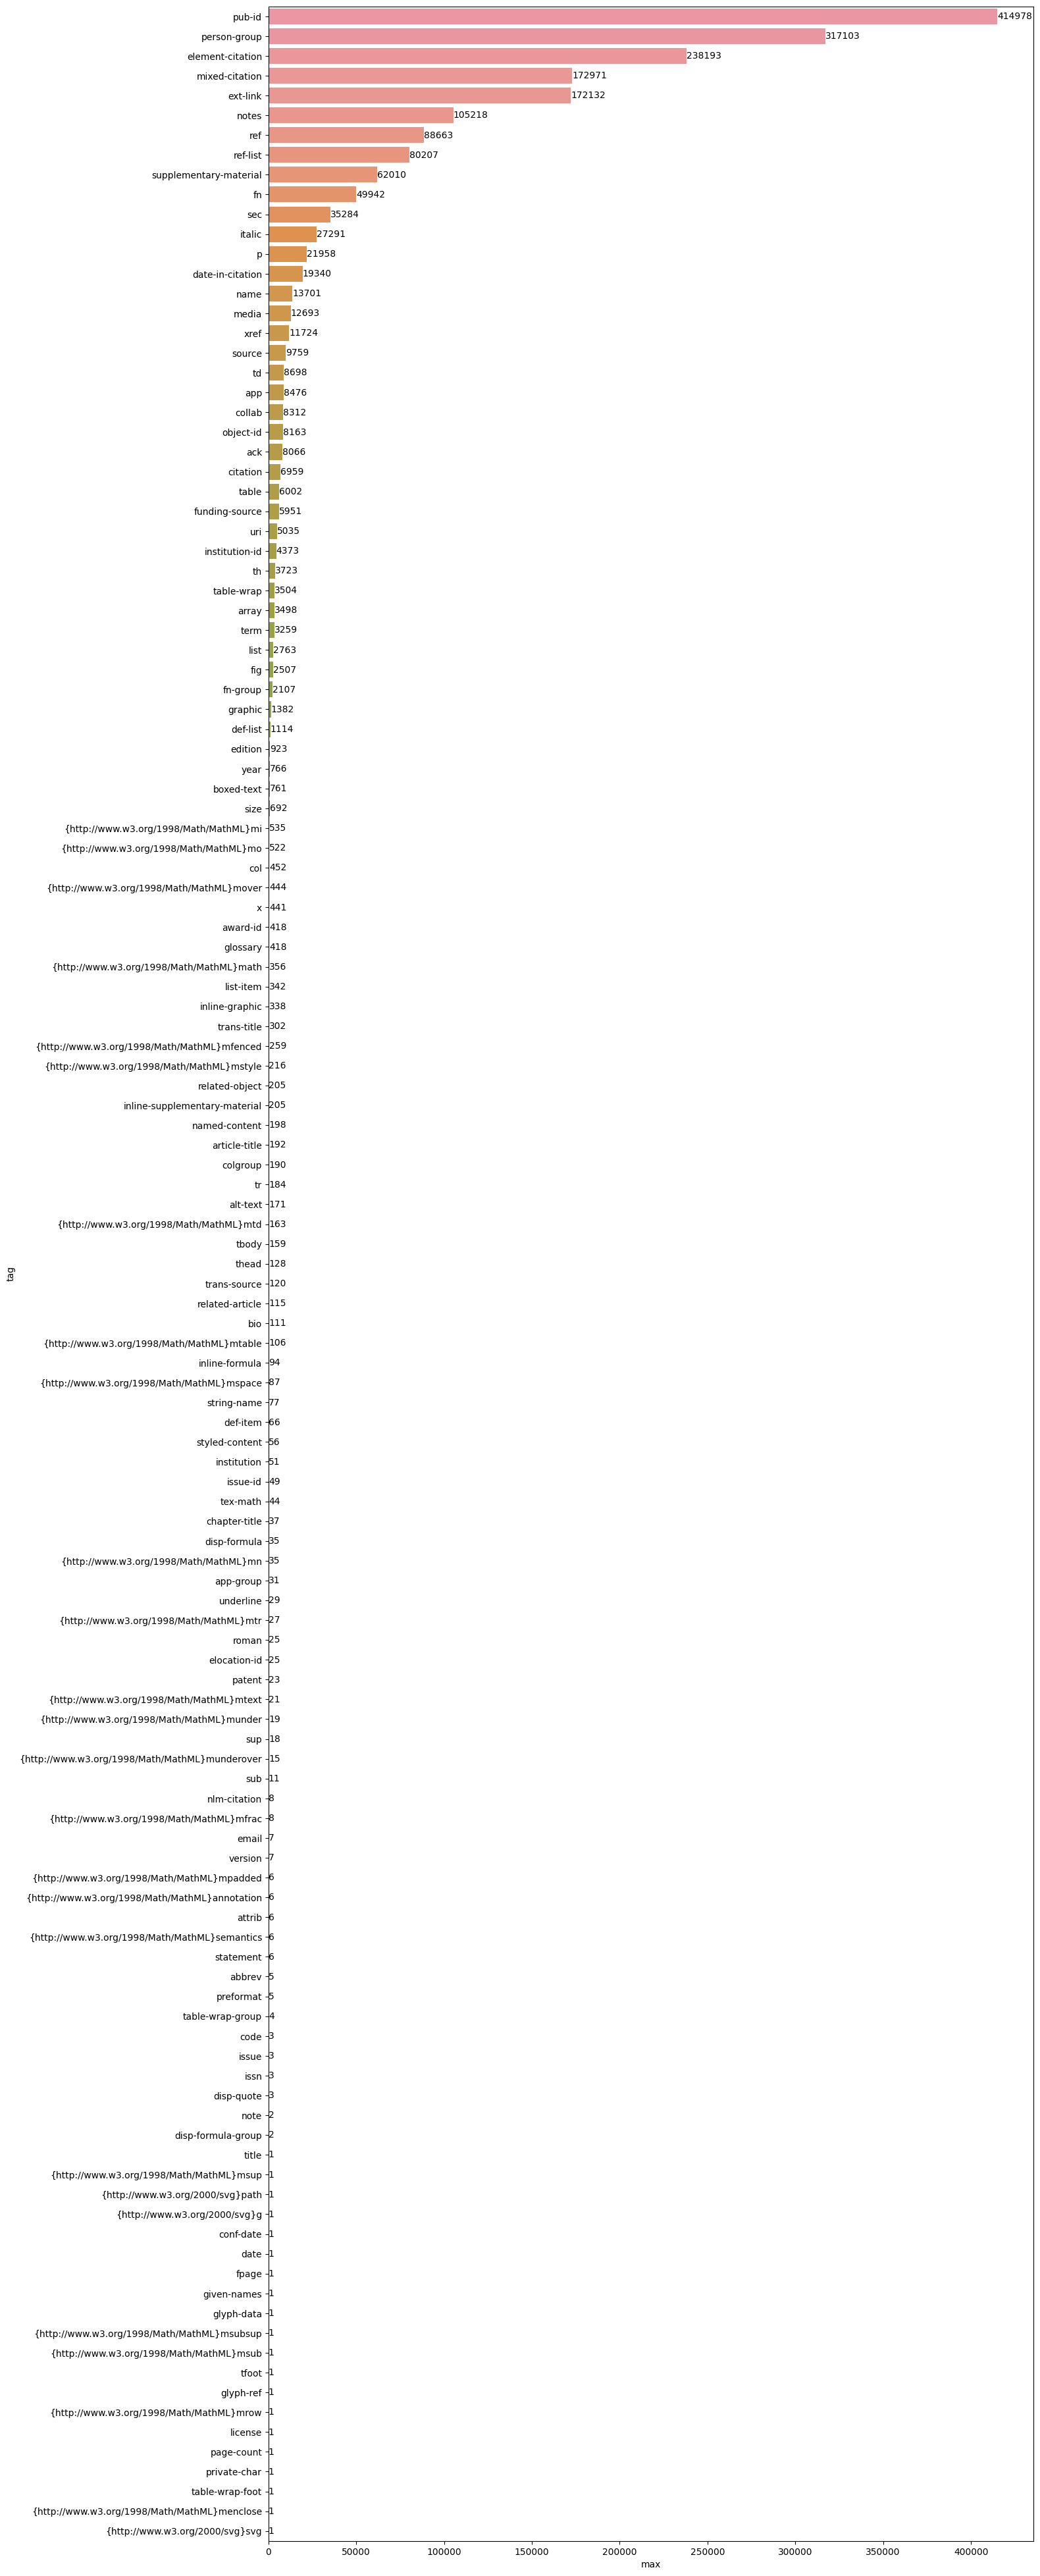

In [8]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=back_type_max['tag'], x=back_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [13]:
pub_id = df_attr[(df_attr['level'] == 'back') & (df_attr['tag'] == 'pub-id')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
pub_id = pub_id[pub_id['max'] > max(pub_id['max'])*0.001]

pub_id

,attr,attr_val,max
24,pub-id-type,pmid,414978
18,pub-id-type,doi,270568
21,pub-id-type,other,13577
25,pub-id-type,publisher-id,7681
20,pub-id-type,medline,3106
15,pub-id-type,arxiv,1467
22,pub-id-type,pii,909
12,pub-id-type,accession,444


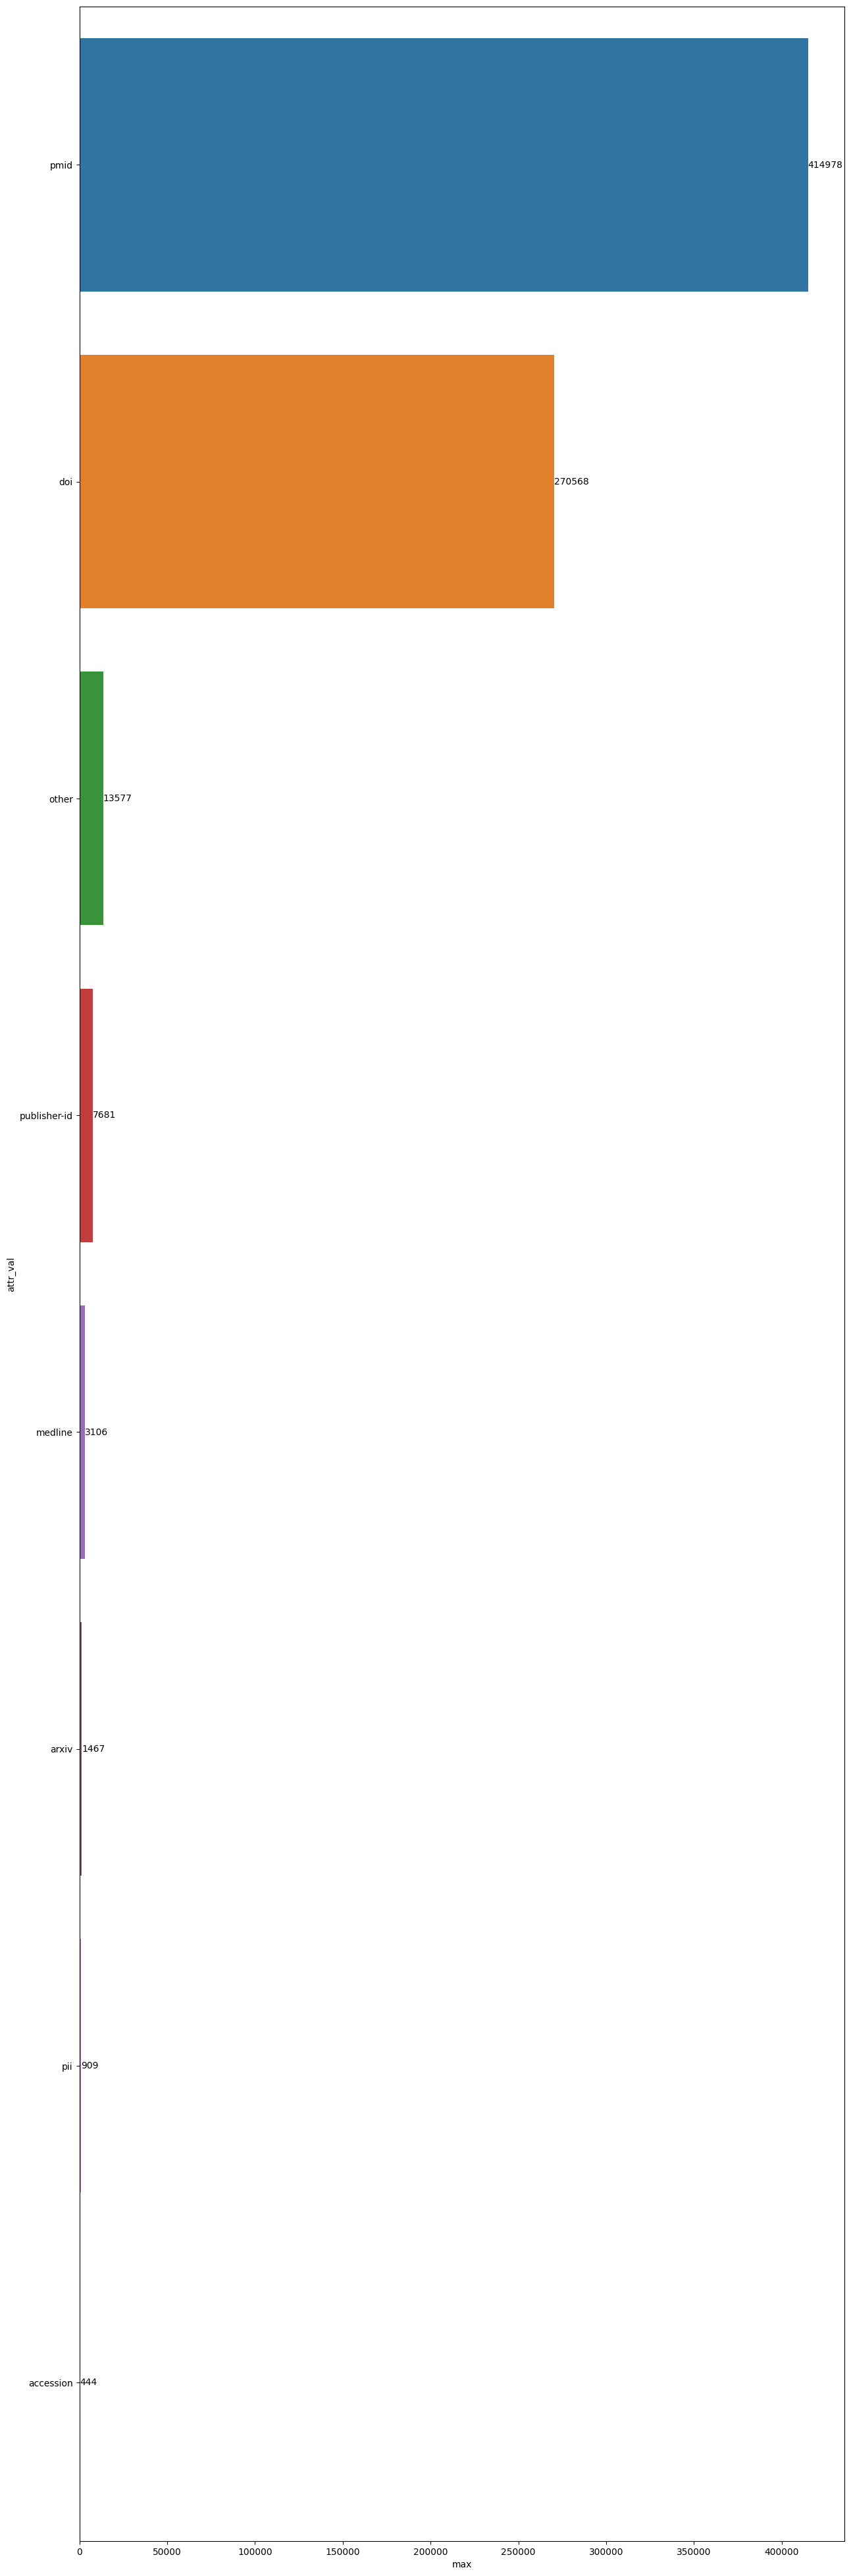

In [14]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=pub_id['attr_val'], x=pub_id['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [20]:
person_group = df_attr[(df_attr['level'] == 'back') & (df_attr['tag'] == 'person-group')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
person_group

,attr,attr_val,max
2,person-group-type,author,317103
9,person-group-type,editor,58483
0,person-group-type,allauthors,910
12,person-group-type,translator,116
11,person-group-type,inventor,63
5,person-group-type,compiler,59
13,specific-use,dash,35
6,person-group-type,curator,23
14,specific-use,sc,11
1,person-group-type,assignee,4


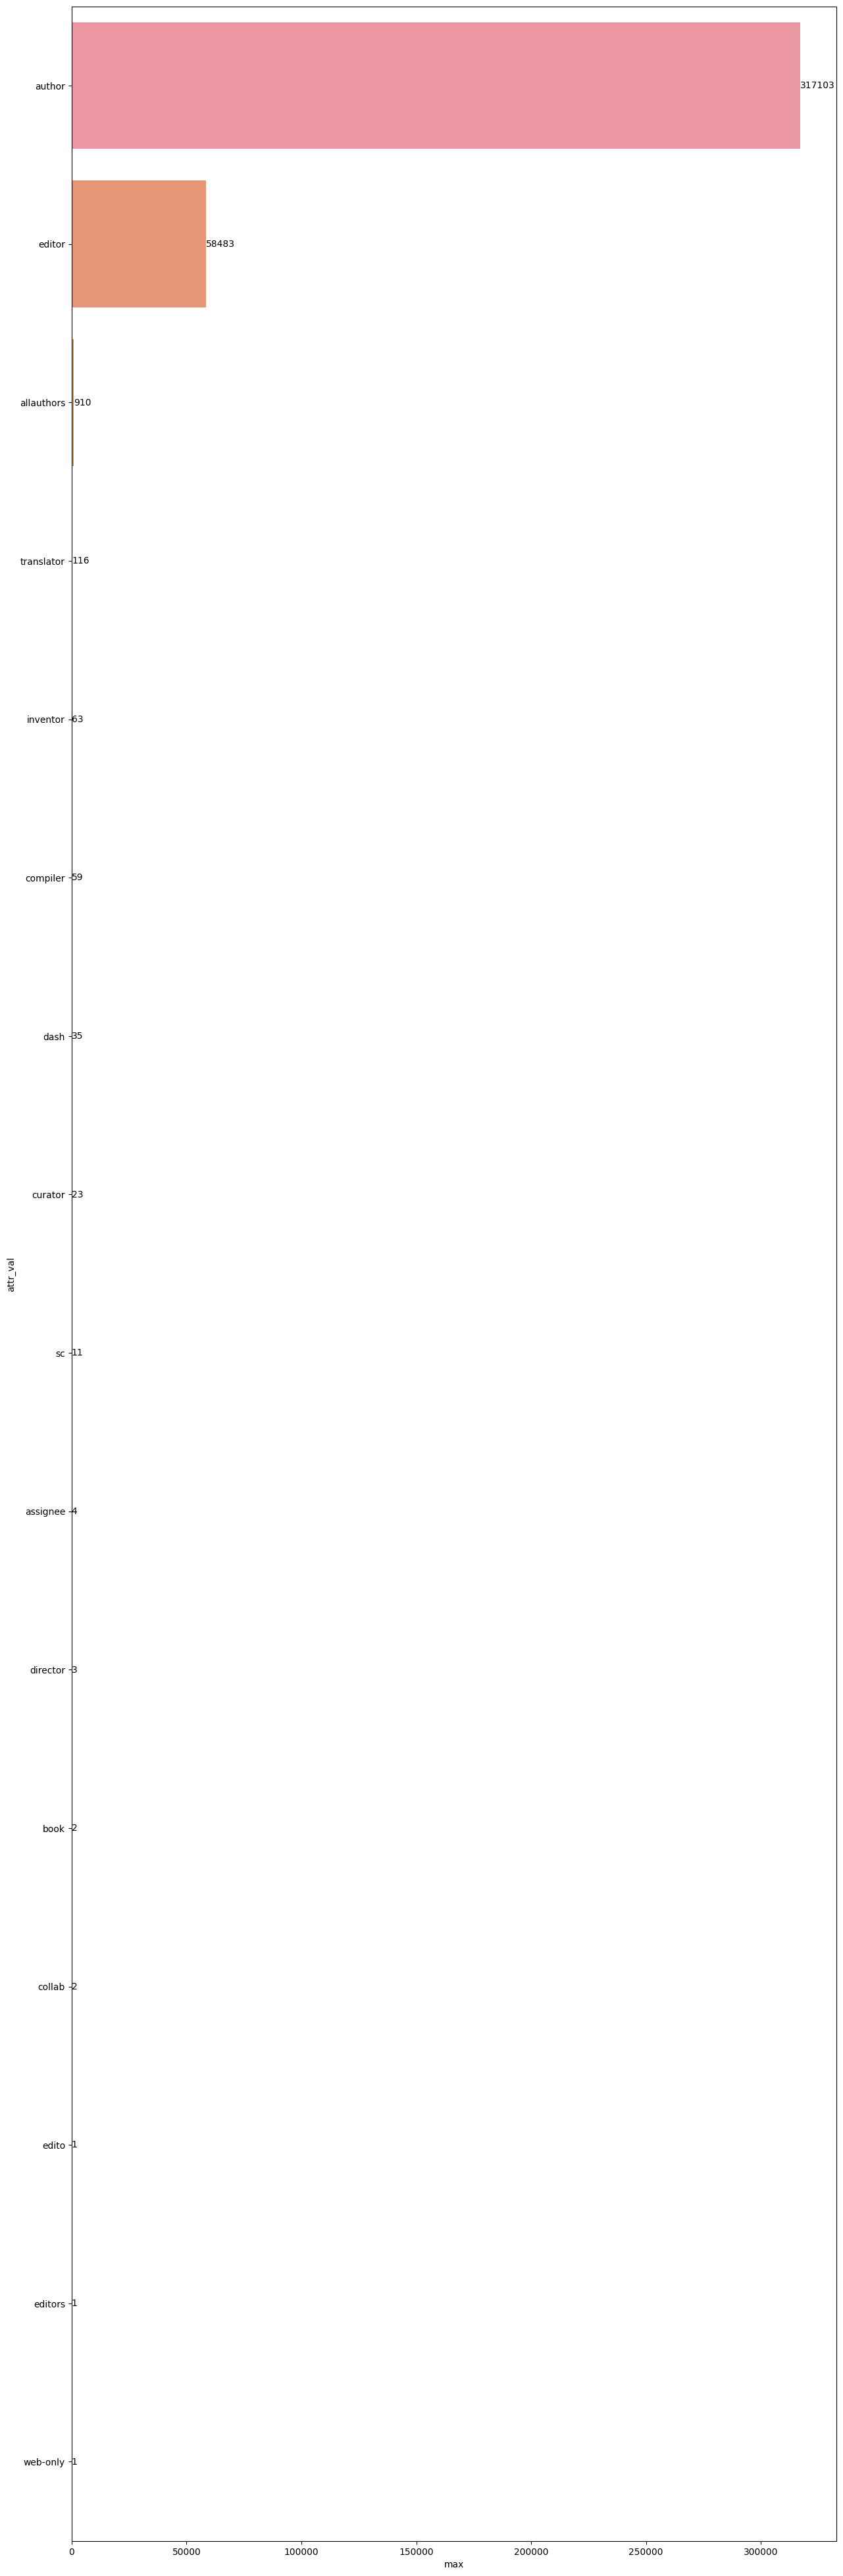

In [21]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=person_group['attr_val'], x=person_group['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [22]:
element_citation = df_attr[(df_attr['level'] == 'back') & (df_attr['tag'] == 'element-citation')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
element_citation

,attr,attr_val,max
25330,publication-type,journal,238193
25309,publication-type,book,97489
25362,publication-type,webpage,14075
25340,publication-type,other,12351
25318,publication-type,confproc,11880
...,...,...,...
10653,id,optQm3xfAFKlM,1
10652,id,optQlNnWdRK3q,1
10651,id,optQkHhIKEmZn,1
10650,id,optQk2yyKeshZ,1
